# Linear Regression with Pytorch.

In this notebook, we will take a first glance of pytorch power.

We will create a simple linear model $y = ax+b$.



For example, we have car company. If the car price is low, we sell more car. If the car price is high, we sell less car. This is the fact that we know and we have data set about this fact.

The question is that what will be number of car sell if the car price is 100.

## Create data

In [ ]:
# first some libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
import torch.nn as nn # nn = Neural Networks
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Let's define some data
car_prices_array = [3,4,5,6,7,8,9]
car_prices_np = np.array(car_prices_array, dtype=np.float32)

car_prices_np = car_prices_np.reshape(-1,1) # to be a column
car_prices_tensor = Variable(torch.from_numpy(car_prices_np))

# Let's define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)

number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1) # to be column
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))


## Visualise the data

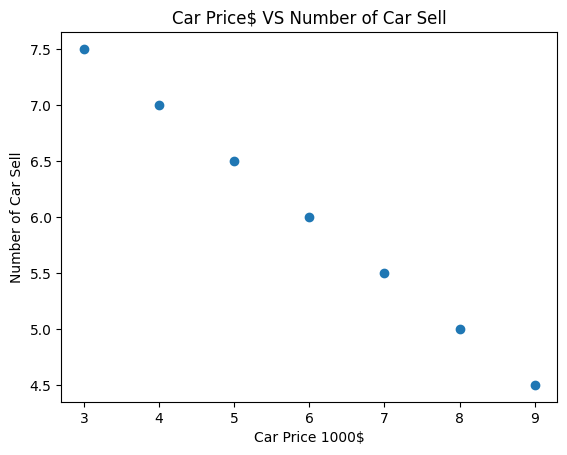

In [ ]:
plt.scatter(car_prices_tensor, number_of_car_sell_tensor)
plt.xlabel("Car Price 1000$")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

## Implementation of Linear Regression

The general steps to create and run a model is like this:

1.   Create a class of the model
2.   Define a model from the above class
3.   Define the loss function
4.   Define optimizer
5.   Train the model
6.   Make the prediction



### Create the LinearRegression class

In [ ]:
class LinearRegression(nn.Module):
  # we use the nn.Module to inhire the functions of a neural networks
  # we implement this with the __init__

    def __init__(self,input_size,output_size):
        # super function. It inherits from nn.Module and we can access everythink in nn.Module
        super(LinearRegression,self).__init__()
        # Linear function.
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)

### Define an object of the Linear Class

In [ ]:
input_dim = 1
output_dim = 1

model = LinearRegression(input_dim, output_dim)

### Define Loss Function and Optimizer



In [ ]:
# loss function = MSE
mse = nn.MSELoss()

# optimizer = SGD:stochastic gradient descent

learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

### Train the model

In [ ]:
loss_list = []
num_iterations = 1000
for iteration in range(num_iterations):

  # reset optimazation
  optimizer.zero_grad()

  # get the results of the model with Forward
  results = model(car_prices_tensor)

  # Caculate loss
  loss = mse(results, number_of_car_sell_tensor)

  # Backward propagation
  loss.backward()

  # Update parameters
  optimizer.step()

  # Save loss
  loss_list.append(loss.data)

  # print loss
  if(iteration % 100 == 0):
    print('epoch {}, loss {}'.format(iteration, loss.data))

epoch 0, loss 122.8934555053711
epoch 100, loss 4.041868209838867
epoch 200, loss 1.845626950263977
epoch 300, loss 0.8427641987800598
epoch 400, loss 0.38482871651649475
epoch 500, loss 0.17572329938411713
epoch 600, loss 0.08024052530527115
epoch 700, loss 0.036639969795942307
epoch 800, loss 0.0167309008538723
epoch 900, loss 0.00763986399397254


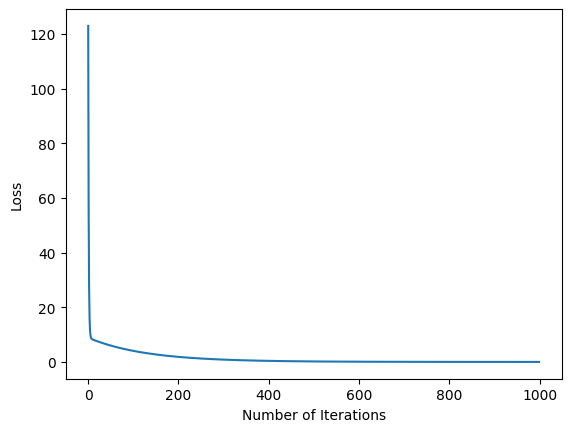

In [ ]:
# plot loss
plt.plot(range(num_iterations),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

### Make predictions

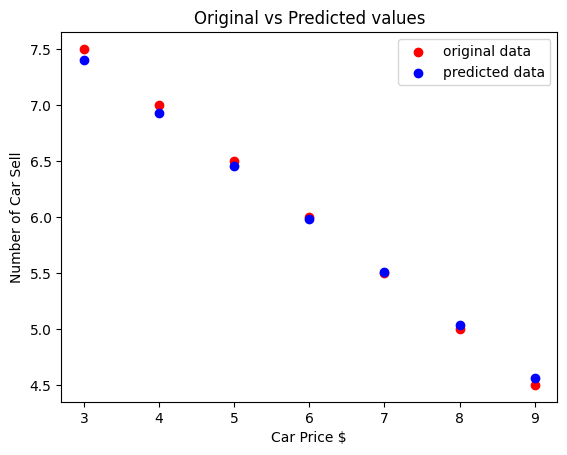

In [ ]:
# predict our car price
predicted = model(car_prices_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

In [ ]:
predicted

array([[7.3974795],
       [6.9255643],
       [6.4536495],
       [5.9817343],
       [5.509819 ],
       [5.037904 ],
       [4.565989 ]], dtype=float32)